## Cat and Dog Classifications 
###  Name                   : Muhammad Idham Habibie
###  Student Number : PYIM004UH004

### 1. Import the Libraries

In [1]:
# Import all libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math

from PIL import Image
import PIL
# Import All Images Libraries
from matplotlib import pyplot
from matplotlib.image import imread

### 2. Loading the Dataset
I put the directory to **cats_and_dogs_filtered/cats_and_dogs_filtered/train/cats/** for the training dataset of cats. The Directory here is related to Cats. 

cats_and_dogs_filtered/cats_and_dogs_filtered/train/cats/cat.0.jpg
cats_and_dogs_filtered/cats_and_dogs_filtered/train/cats/cat.1.jpg
cats_and_dogs_filtered/cats_and_dogs_filtered/train/cats/cat.2.jpg
cats_and_dogs_filtered/cats_and_dogs_filtered/train/cats/cat.3.jpg
cats_and_dogs_filtered/cats_and_dogs_filtered/train/cats/cat.4.jpg
cats_and_dogs_filtered/cats_and_dogs_filtered/train/cats/cat.5.jpg
cats_and_dogs_filtered/cats_and_dogs_filtered/train/cats/cat.6.jpg
cats_and_dogs_filtered/cats_and_dogs_filtered/train/cats/cat.7.jpg
cats_and_dogs_filtered/cats_and_dogs_filtered/train/cats/cat.8.jpg


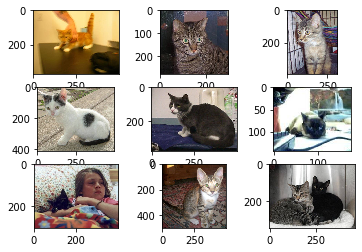

In [2]:
# Loading the Dataset
folder = "cats_and_dogs_filtered/cats_and_dogs_filtered/train/cats/"

# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    filename = folder + 'cat.' + str(i) + '.jpg'
    print(filename)
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs/dog.0.jpg
cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs/dog.1.jpg
cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs/dog.2.jpg
cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs/dog.3.jpg
cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs/dog.4.jpg
cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs/dog.5.jpg
cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs/dog.6.jpg
cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs/dog.7.jpg
cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs/dog.8.jpg


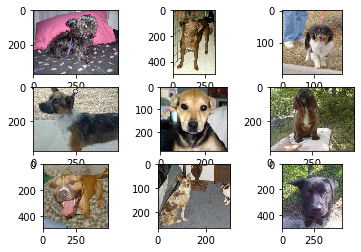

In [3]:
# Loading the Dataset
folder = "cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs/"

# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    filename = folder + 'dog.' + str(i) + '.jpg'
    print(filename)
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

## 3. Image Data Generator

- Loading the Training and Test Dataset, the trainDataset and testDataset

In [4]:
#From Keras Documentation
from keras.preprocessing.image import ImageDataGenerator

trainDatagen = ImageDataGenerator(
                    rescale=1./255,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True)

testDatagen = ImageDataGenerator(rescale=1./255)

trainDataset = trainDatagen.flow_from_directory(
        'cats_and_dogs_filtered/cats_and_dogs_filtered/train',
        target_size=(64, 64),
        batch_size=64,
        class_mode='binary')

testDataset = testDatagen.flow_from_directory(
        'cats_and_dogs_filtered/cats_and_dogs_filtered/validation',
        target_size=(64, 64),
        batch_size=64,
        class_mode='binary')

Using TensorFlow backend.


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
# For Images and Labels

for images, labels in trainDataset:
     break
print(images)
print(labels)

[[[[0.8269738  0.86298376 0.9843138 ]
   [0.8269901  0.8629756  0.9843138 ]
   [0.82700646 0.86296743 0.9843138 ]
   ...
   [0.9534595  0.9458755  0.9481126 ]
   [0.95347583 0.94589996 0.9480841 ]
   [0.95349216 0.94592446 0.94805557]]

  [[0.79546314 0.83395606 0.936332  ]
   [0.7954224  0.8339194  0.9362708 ]
   [0.79538155 0.83388263 0.93620956]
   ...
   [0.9667319  0.96578413 0.924886  ]
   [0.96674824 0.9658086  0.92485744]
   [0.96676457 0.96583307 0.92482895]]

  [[0.77006817 0.81187916 0.90213245]
   [0.7700396  0.8118547  0.90209574]
   [0.770011   0.8118302  0.902059  ]
   ...
   [0.96578336 0.960095   0.9500106 ]
   [0.96577924 0.9600827  0.95005137]
   [0.96577513 0.96007043 0.95009214]]

  ...

  [[0.6101275  0.6375785  0.7081667 ]
   [0.61013156 0.63758254 0.7081708 ]
   [0.6101356  0.63758665 0.7081749 ]
   ...
   [0.5965655  0.60048705 0.6161733 ]
   [0.59654105 0.6004626  0.6161489 ]
   [0.59651655 0.6004381  0.6161244 ]]

  [[0.6151265  0.64257747 0.7131657 ]
   [0.6

## 4. Deploy the Convolutional Neural Network (CNN)

In [6]:
# Initializising CNN
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same",
                           activation="relu", input_shape=(64, 64, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation="softmax")
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0

## 5. Compiling the CNN to the model

In [7]:
# Compiling to the CNN
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Fitting the CNN to the images
history = model.fit(
    trainDataset,
    epochs=100,
    steps_per_epoch= math.ceil(len(trainDataset)/batch_size),
    validation_data=testDataset, 
    validation_steps = math.ceil(len(testDataset)/batch_size)
)

NameError: name 'batch_size' is not defined

## 6. Plotting the Losses and Validation Losses

In [ ]:
plt.plot(history.history['loss'], label="train")
plt.plot(history.history['val_loss'], label="validation")
plt.xlabel("# of epoch")
plt.ylabel("Loss")
plt.title("Plot the # of Epoch vs Loss")
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label="train")
plt.plot(history.history['val_accuracy'], label="validation")
plt.xlabel("# of epoch")
plt.ylabel("Accuracy")
plt.title("Plot the # of Epoch vs Accuracy")
plt.legend()
plt.show()

In [ ]:
# Predicting the Value
predictions = model.predict(testDataset)
print("preds:", np.argmax(predictions, axis=1))

In [ ]:
# Evaluating the Model
model.evaluate(testDataset, steps = math.ceil(len(testDataset)/batch_size))

## 7. Predicting the Cat and Dog

In [ ]:
# Loading the Dataset
folder = "cats_and_dogs_filtered/cats_and_dogs_filtered/validation/"

for i in range(1,9):
    j = i + 2000
    filename = folder + 'cats/' + 'cat.' + str(j) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
    # show the figure
    pyplot.show()
    print("Probability that it is a Cat = ", "%.2f" % predictions[i][1])

In [ ]:
# Loading the Dataset
folder = "cats_and_dogs_filtered/cats_and_dogs_filtered/validation/"

for i in range(1,9):
    j = i + 2000
    filename = folder + 'dogs/' + 'dog.' + str(j) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
    # show the figure
    pyplot.show()
    print("Probability that it is a Dog = ", "%.2f" % predictions[i+500][1])

In [ ]:
num_rows = 3
num_cols = 3
num_images = num_rows * num_cols
fig = plt.figure(figsize=(2*2*num_cols, 2*num_rows))
ax = fig.add_axes([0,0,1 ,1])
for i in range(num_images):
    
    # Plotting the Subplot 
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    j = i + 2000
    filename = folder + 'dogs/' + 'dog.' + str(j) + '.jpg'
    # load image pixels
    image = imread(filename)
    pyplot.imshow(image)
    # show the figure
    pyplot.show()
    
    # Plotting the Subplot
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    ax.bar(list(new_pred.columns), new_pred.iloc[i,:])
    plt.show()